# Banking Customer Data: Term Deposit Subscription Targeting 

### Problem Definition:

This bank currently has a low number of customers that are subscribed to term deposits. Term deposits are beneficial for the bank because they provide a stable source of predictable cash flow, funding, as well as profit opportunities for the bank by allowing them to lend to other banks at a higher interest rate. Term deposit also reduce the risk of sudden withdrawals, which also supports its customer retention through attractive rates, and help manages interest rate fluctuations. Increasing the number of term deposits will enable the bank to enhance liquidity management and improve overall profitability. 

### Objective:

The objective of this project is to increase the number of clients subscribing to long term deposits. This will be done by identifying the characteristics of clients who are most likely to subscribe. Characteristics such as job, education, balance, marital status, age, etc. This benefits the bank because it targets its marketing efforts more effectively such as offering personalized incentives (higher interest rates) to clients to maximize their subscription rates.


### Business Understanding:

Bank resources such as marketing can optimize their efforts by focusing on clients that are most likely to subscribe.It improves the converstion rates for term deposits. By having more term deposit subscriptions, it increases the bank's cash flow stability. 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#upload the dataset

df = pd.read_csv("BankCustomerData.csv")

In [3]:
#Review the first 5 rows

df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


------------------------------------------------------------

# Data Understanding

In [4]:
# Shape of the data

df.shape

(42639, 17)

The dataset has 17 columns and 42,639 rows.

#### Subscription rates

In [5]:
subscription_counts = df['term_deposit'].value_counts(normalize=True) * 100
print(subscription_counts)

no     90.710383
yes     9.289617
Name: term_deposit, dtype: float64


Understanding this data shows that only 9.29% of the customers are subscribed to term deposit and 90.7% are not. 

In [6]:
#statistical analysis of the dataset

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


#### Interpretation:

**Age:** This shows that the bank currently have customers of different age groups. Minimum of 18 year olds, Maximum of 95, and a mean of 40 year olds. Older customers might be inclined more towards invesments such as term deposits while the younger age group might need more incentives such as education.

**Balance:** With a maximum of $100,000+ balance and a minimum of a negative balance, it can be understood that the bank has a large variation in customers. The ones with a higher balance will more likely be interested in term deposits in compared to the ones with low balance, might be less interested or need more incentive.

**Day**: The average day value shows 15.85. It is the day of the month that the customer was last contacted. It could help the call center/marketing team to analyze if there is perhaps a certain time of the month when a client is more open to bank offers.

**Duration:** The mean shows an average of 255 seconds per phone call. Maximum of 4918 seconds. Longer calls shows more interest in subscribing to long term deposits.

**Campaign**: The mean shows that customers were contacted approximately 2.8 times in their current campaign. It shows that repeated attemps are common. However, it is helpful to understand the optimal number of attemps without having a negative impact in customers experience that could lead to them declining term deposit.

**pdays:** The negative indicates that the customers were not contacted and the mean shows on average a customer wasn't contacted in 34 days. This shows that their is room to call customer and engage them in the incentive.

**previous:** The average is low. Showing a customer has not been contacted multiple times, again shows that their are customers who can be called.




In [7]:
# Check if there any missing values in the dataset

df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

There are no null or missing values in the dataset.

----------------------------------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

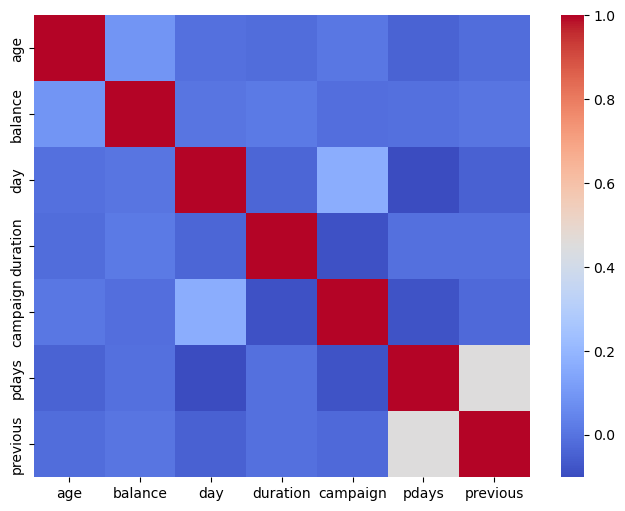

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

### Interpretation:

**Weak Correlation:** The heatmap shows a weak correlation between age and balance. It means that older customers with higher balance are more likely to subscribe to a term deposit.

**Positive Correlation:** There’s a moderately positive correlation between duration and other variables, such as previous. It could imply that longer calls are associated with higher customer engagement, potentially increasing the likelihood of a term deposit subscription. It is helpful to understand customer engagement.

**Weak or No Correlation:** Variables such as campaign have no correlation with age or balance. It shows that these variables work independentaly.

### Insights for business understanding:

Targetting older customers who tend to have a higher balance could be beneficial for term deposit marketing. The marketing team can tailor more incentives and benefits for the older customer to engage them more into subscription. Longer calls with customers shows higher interest in term deposit. Therefore, focusing on these customers in future calls could improve subscription rates. 

**Analyzing subscription rates by marketing efforts**

In [9]:
subscription_by_campaign = df.groupby('term_deposit')['campaign'].mean()
subscription_by_duration = df.groupby('term_deposit')['duration'].mean()

print(subscription_by_campaign)
print(subscription_by_duration)

term_deposit
no     2.875226
yes    2.242111
Name: campaign, dtype: float64
term_deposit
no     221.441853
yes    592.992679
Name: duration, dtype: float64


**Interpretation** 

*Non subscribors:* Customers who did not subscribe to a term deposit received, on average, 2.88 contact attempts during the campaign. The average call duration is 221.41 seconds.

*Subscribors:* Customers who subscribed were contacted slighly less, subscribed more with an average of 2.24 attemps. The call duration during phone call is an average of 593 seconds which is much higher than individuals who did not subscribe.

**Insights**

This suggests that repeat calling marketing style doesn't prove to be more effective when it comes to subscriptions. Marketing might want to look into different techniques and more incestives. The call duration shows the interest of the customer. If a phone call runs longer, the customer is more interested in subscribibg to term deposit.

**What is the subscription rate using factors such as age and balance?**

In [10]:
subscription_by_age = df.groupby('term_deposit')['age'].mean()
subscription_by_balance = df.groupby('term_deposit')['balance'].mean()

print(subscription_by_age)
print(subscription_by_balance)


term_deposit
no     40.759010
yes    41.079778
Name: age, dtype: float64
term_deposit
no     1286.736646
yes    1772.518808
Name: balance, dtype: float64


**Interpretation**

*Non Subcribors:* People at the average age of 40.7 said no to term deposit.
Additionally, people at the average balance of 1286.73 did not enroll in term deposit.

*Subscribors:* People at the average age of 41 and higher said yes to term deposit. 
People with balance of 1772.51 and higher enrolled in term deposit.

**Insights**

As seen above, age alone doesn't play much of a factor in understanding a customers incenstive to term deposit. However, there was a significant difference between bank balance when it comes to term deposit. This is because higher bank balance have more financial security and are able to invest for their future.

--------------------------------------------------------------------------------------------------------------------------------------------

# Data Preperation

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

**Data Prep**

Below I will do the following things:

- Map yes/no to 1 or 0 and show if it was done correctly without any missing values

- Hot encode all categorial variables such as job, education, marital status, as well as contact.

- Create 'total_contacts' by combining 'campaign' and 'previous'

- Standardize all numerical features so that they hold same value when we evaluate model.

- Apply One-Hot Encoding to any non-numeric columns


In [12]:
# Display unique values in each column
print("Unique values in 'housing':", df['housing'].unique())
print("Unique values in 'loan':", df['loan'].unique())
print("Unique values in 'term_deposit':", df['term_deposit'].unique())


Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'term_deposit': ['no' 'yes']


In [13]:
# Directly map 'yes'/'no' to 1/0 without filling any values
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['term_deposit'] = df['term_deposit'].map({'yes': 1, 'no': 0})

# Verify that no NaN values were introduced
print("NaN values per column after mapping:\n", df.isnull().sum())


NaN values per column after mapping:
 age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64


In [14]:
# Identify the categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

# Apply One-Hot Encoding to the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Verify the result
print("Data columns after One-Hot Encoding:\n", df.columns)


Data columns after One-Hot Encoding:
 Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'term_deposit', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [15]:
# Create 'total_contacts' by combining 'campaign' and 'previous'
df['total_contacts'] = df['campaign'] + df['previous']

In [18]:
# Define features and target
X = df.drop(columns=['term_deposit'])
y = df['term_deposit']


In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Identify numerical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on X_train, transform on X_test
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [30]:
# Check the data types of X_train columns
print("Data types in X_train:\n", X_train.dtypes)

# Identify non-numeric columns, if any
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols)


Data types in X_train:
 age                    float64
balance                float64
housing                float64
loan                   float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
job_unknown              uint8
marital_married          uint8
marital_single           uint8
education_secondary      uint8
education_tertiary       uint8
education_unknown        uint8
contact_telephone        uint8
contact_unknown          uint8
month_aug                uint8
month_dec                uint8
month_feb                uint8
month_jan                uint8
month_jul      

In [32]:
# Apply One-Hot Encoding to any non-numeric columns
if len(non_numeric_cols) > 0:
    X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

    # Ensure X_train and X_test have the same columns
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


--------------------------------------------------------------------------------------------------------------------------------------------------------------

# Modeling and Evaluation

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

In [49]:
# Step 1: Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Step 2: Predict probabilities on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

In [63]:
# Step 3: Apply the custom threshold of 0.3
threshold = 0.3
y_pred_custom = (y_pred_proba >= threshold).astype(int)

*Why threshold of 0.3 instead of standard 0.5?*

Lower threshold was set because it will allow the bank to reach a broader audience of potential subscribers to match the banks goal of high number of subscribers. While it may increase the number of false positives, it will ensure that more potential subscribers are being targeted which will help with marketing efforts of getting more subscribers.

In [64]:
# Step 4: Evaluate the model with the custom threshold
accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
roc_auc = roc_auc_score(y_test, y_pred_proba)  # AUC does not depend on threshold

In [65]:
# Print evaluation metrics
print("Model Evaluation with Custom Threshold (0.3):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC-ROC:", roc_auc)

Model Evaluation with Custom Threshold (0.3):
Accuracy: 0.9118198874296435
Precision: 0.5217965653896962
Recall: 0.661641541038526
AUC-ROC: 0.93020099202687


In [66]:
# Confusion Matrix and Classification Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report:\n", classification_report(y_test, y_pred_custom))


Confusion Matrix:
 [[10874   724]
 [  404   790]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     11598
           1       0.52      0.66      0.58      1194

    accuracy                           0.91     12792
   macro avg       0.74      0.80      0.77     12792
weighted avg       0.92      0.91      0.92     12792



**Interpretation**

Model Evaluation with Custom Threshold (0.3):
Accuracy: 0.9118198874296435 : The model has the accuracy of 91%. 
Precision: 0.5217965653896962: When the model predicts a subscriber, it is accurate 52% of the time
Recall: 0.661641541038526: When model finds 66% of actual subscribers, which means it catches most of the people likely to subscribe.
AUC-ROC: 0.93020099202687: hows the model is very good at telling subscribers and non-subscribers apart.

**Insights**

Confusion Matrix:
 [[10874   724]
 [  404   790]]

True Subscribers are 790: These are the customers who are likely to subscribe that the model successfully identified.
Missed Subscribers are 404: These are the ones that the model missed. However, the model has a recall of 66% which means, it is reaching most of them
False positive of 724: This happened because model is trying to reach a wider customer base to identify more subscribers

In [67]:
# Define subscription likelihood segments
X_test['subscription_probability'] = y_pred_proba
X_test['segment'] = pd.cut(y_pred_proba, bins=[0, 0.3, 0.7, 1], labels=['Low', 'Medium', 'High'])

# Count customers in each segment
segment_counts = X_test['segment'].value_counts()
print(segment_counts)


Low       7382
Medium    1387
High        83
Name: segment, dtype: int64


This is the distribution of customers by subscription probability segments based on the model's predictions:

- Low 7382: These are customers with a low likelihood of subscribing to a term deposit. Marketing efforts may be less effective for this group.

- Medium 1,387 customers: These customers have a moderate likelihood of subscribing. Targeted marketing with personalized offers or follow-up communications might help convert some of these customers.

- High 83 customers: This small group has a high likelihood of subscribing. Focusing marketing efforts on these customers, using better incentive and deals, these customers have a higher chance of subscribing to long term deposit.

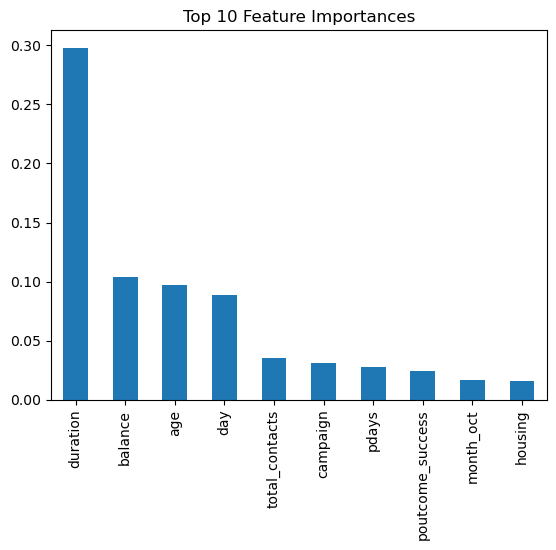

In [71]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 10 features
feature_importances[:10].plot(kind='bar', title='Top 10 Feature Importances')
plt.show()

This figure shows the imporant features that can be used to target customers with higher probability. The customers with a high call duration are more interested in term deposit. Age and balance also plays a factor. 

# Summary

The analysis of "Term Deposit Subscription Targeting" and model provides a targeted approach for the bank to increase term deposit subscriptions by identifying customer base that is most likely to subscribe. The analysis explored the correlation between different variables. It showed correlation between age and balance. It means that older customers with higher balance are more likely to subscribe to a term deposit. To better understand customer engagement, the heatmap showed moderately positive correlation between duration and other variables, such as previous. It could imply that longer calls are associated with higher customer engagement, potentially increasing the likelihood of a term deposit subscription. Further analysis also determined, age alone doesn't play much of a factor in understanding a customers incenstive to term deposit. There is a significant difference between bank balance when it comes to term deposit. This is because higher bank balance have more financial security and are able to invest for their future.

Upon building a random forest model with a custom threshold of 0.3, it received an accuracy of 91%. We also recieved a high recall of 66%. This captures a majority of potential subscribers, which aligns with banks's objective to expand more term deposit. In this analysis, we also learned the top factors that influence subscription liklehood. Factors such as customer engagement (longer phone duration) and financial security. For customer segmentation, Low 7382: These are customers with a low likelihood of subscribing to a term deposit. Medium 1,387 customers: These customers have a moderate likelihood of subscribing. High 83 customers: This small group has a high likelihood of subscribing.

# Recommendation

My recommendation for the bank would be to prioritize their customers with high probability. By focusing on this, the marketing resources are being used fully and correctly. Focusing marketing efforts on high segment customers by offering attractive deals/incentives. This could included sign up bonuses, high interest rates or even as small as offering sign up gifts. The segment is small but it is highly likely to convert, which makes it the most valuable target. For its customers with medium probability, use cost effective marketing strategies such as email campaigns and personalized offers to get their interest and enourage more subscriptions. Medium group is the largest group and this strategy can help increase subscriptions without the excessive cost.

Strategies: It was shown that features like contact duration, frequency, and previous sucess significantly impact subscription likelihood. The bank's call center team should keep up their efforts with contacting customers and communicating the banks offers, education and build strong customer relationship. It should create more educational and promotional information for customers with lower bank balance to promote fixed deposit for those who might not be fully aware of the benefits. The chart also showed that timing is also highly important. Seasonal campaign timing which seems to be october appear to influence subscriptions. The marketing team can push during these period to maximize reach and engagement. 

By implenting the recommendations and insights from this analysis, the bank can efficiently allocate resoures which will improve their goal of term deposit conversions, and in result have profit and more stable cash flow.